In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_minset = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_minset.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images[0, 23, 23]

194

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
class_names = ['T-shirt', 'Trouser', 'PullOver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

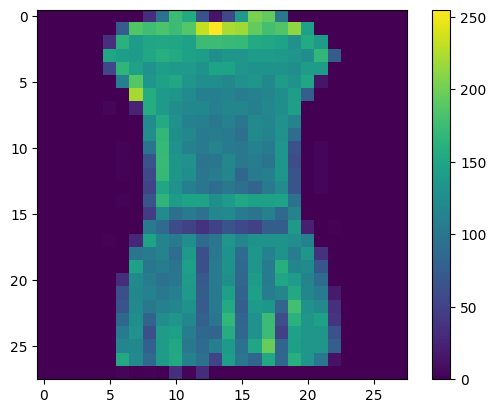

In [15]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the Model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)), #Input layer(1)
    keras.layers.Dense(128, activation='relu'), #Hidden layer(2)
    keras.layers.Dense(10, activation='softmax') #Output Layer(3)
])

In [19]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

# Training The Model

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4905 - accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3330 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3105 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

# Evaluating the Model

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test Accuracy:",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8829
Test Accuracy: 0.8828999996185303


# Making Predictions

In [23]:
pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [29]:
print(class_names[np.argmax(pred[3])])

Trouser


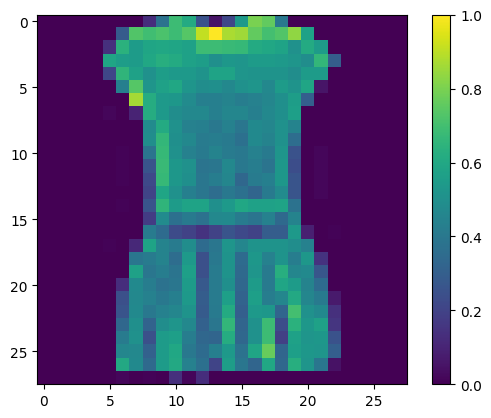

In [30]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [32]:
plot_image()
plot_value_array()

TypeError: plot_image() missing 4 required positional arguments: 'i', 'predictions_array', 'true_label', and 'img'